In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Chekcing for null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# dropping the null valued rows and storing it in a new df
df_no_null = df.dropna()

In [7]:
# resetting the index of the new df
df_no_null.reset_index()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## In this approach we will be using the columns title and text as our training set along with the author column.

The columns title and text will be combined into one column and will undergo tfidf vectorization. Whereas the author column will undergo label encoding seperately. The reason behind this is, in case two authors have the same first name the tfidf vectorizer will try to add similarity between them which is not necessarily helpful infact it can be misleading cause the authors may not be related in any sense at all. so we label encode the author column separetely.

In [8]:
# seperating features and target column
target = df_no_null['label']
features = df_no_null.drop(['label'], axis=1)

In [9]:
# seperating the author column to label encode it seperately
author = features['author']

In [10]:
author.head(7)

0         Darrell Lucus
1       Daniel J. Flynn
2    Consortiumnews.com
3       Jessica Purkiss
4        Howard Portnoy
5       Daniel Nussbaum
7       Alissa J. Rubin
Name: author, dtype: object

In [11]:
# Label encoding the author column
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
encoded_authors = label_encoder.fit_transform(author)

In [18]:
encoded_authors_series = pd.Series(encoded_authors)
encoded_authors_series.head(7)

0     887
1     858
2     783
3    1655
4    1396
5     864
6     192
dtype: int64

In [80]:
# Combining title and text columns and then preprocess them by removing the stop words and unrequired symbols.
df_title_text = pd.DataFrame()
df_title_text['combined_text'] = features['title'] + ' ' + features['text']

# using the index that exists in the df rather than trying to correct it cause iam lazy!! ;(
messed_up_index = df_title_text.index

In [20]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

In [21]:
# nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dheerajmachiraju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/dheerajmachiraju/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
wn_lemmatizer = WordNetLemmatizer()

In [27]:
# Here we are removing unrequired symbols, converting all of corpus into lower case then lemmatizing each remaining word and finally storing it
# in title_text_corpus
title_text_corpus = []

for i in messed_up_index:
    review = re.sub('[^a-zA-Z]', ' ', df_title_text['combined_text'][i])
    review = review.lower()
    review = review.split()
    review = [wn_lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    title_text_corpus.append(review)

In [28]:
# lets vectorize the cleaned corpus of title and text
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
tfidf_vec = TfidfVectorizer(max_features=5000)
vectorized_title_text_corpus = tfidf_vec.fit_transform(title_text_corpus)

lets check the lenght of this vectorized corpus and the encoded author column. We need to do this in order to join them back before we make it our training data. It should probably equal to 18280

In [66]:
vectorized_title_text_corpus.shape, encoded_authors_series.shape

((18285, 5000), (18285,))

In [67]:
from scipy.sparse import hstack, csr_matrix

In [68]:
# converting the pandas series (encoded_authors_series) into a sparse matrix so that we can combine both the output of the 
# tfidf vectorizer and the authors encoded column
encoded_authors_series_sparse = csr_matrix(encoded_authors_series.values.reshape(-1, 1))

In [69]:
# Horizontally stacking these matrices and making it our training data
X = hstack([vectorized_title_text_corpus, encoded_authors_series_sparse])

In [70]:
# target is our target column, renaming it as y
y = target

In [71]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

## Using the Multinomial Naive Bayes classifier

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
fake_news_classifier_model = MultinomialNB()

In [75]:
fake_news_classifier_model.fit(X_train, y_train)

MultinomialNB()

In [76]:
# predicting on X_test
y_pred = fake_news_classifier_model.predict(X_test)

In [77]:
# Evaluate the model's performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

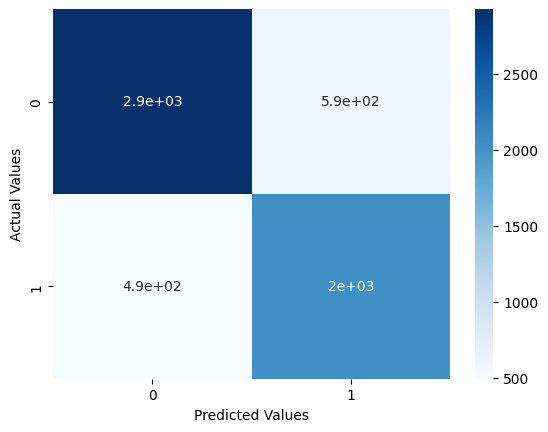

Accuracy of Multinomial Naive Bayes classifier is 82.12%


In [99]:
c_m = confusion_matrix(y_pred, y_test)
c_m

sns.heatmap(c_m, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


accuracy_MultinomialNB = accuracy_score(y_pred, y_test)
print(f"Accuracy of Multinomial Naive Bayes classifier is {round(acc*100, 2)}%")

## Checking the perfromance of Random Forest Classifier

In [100]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [83]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred_rf = rf_classifier.predict(X_test)

In [101]:
accuracy_RandomForestClassifier = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")

Random Forest Classifier Accuracy: 97.61%


## Checking for XGBoost

In [90]:
import xgboost as xgb

In [95]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=True, eval_metric='mlogloss', random_state=42)

In [96]:
xgb_classifier.fit(X_train, y_train)

/home/dheerajmachiraju/anaconda3/envs/fake-news-classifier-venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:45:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [97]:
y_pred_xg_boost = xgb_classifier.predict(X_test)

In [102]:
accuracy_XGBoostClassifier = accuracy_score(y_test, y_pred_xg_boost)
print(f"XGBoost Classifier Accuracy: {accuracy * 100:.2f}%")

XGBoost Classifier Accuracy: 97.61%


In [105]:
accuracy_table = pd.DataFrame({
    'Model': ['MultinomialNB','Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_MultinomialNB * 100, accuracy_RandomForestClassifier * 100, accuracy_XGBoostClassifier * 100]
})
accuracy_table

,Model,Accuracy
0,MultinomialNB,82.120961
1,Random Forest,96.155758
2,XGBoost,97.613919
